# Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
data = pd.concat([train_data,test_data])
build_structure = pd.read_csv('data/building_structure.csv')
build_ownership = pd.read_csv('data/building_ownership.csv')
ward_demographic_data = pd.read_csv('data/ward_demographic_data.csv')

In [3]:
# Shapes
print("DF shapes:", data.shape, build_structure.shape, build_ownership.shape, ward_demographic_data.shape)

DF shapes: (737054, 10) (737054, 26) (737054, 17) (12561, 4)


In [4]:
# Number of train samples
data_samples = data.shape[0]
print ("Train samples:", data_samples)

Train samples: 737054


In [5]:
# Number of features
features = set([i for data in [data, build_structure, build_ownership, ward_demographic_data] for \
                   i in data.columns])
print("Features:", len(features))

Features: 51


In [6]:
# Merge dataframes
merged_data = data.merge(build_structure, how='outer')
merged_data = merged_data.merge(build_ownership, how='inner')
merged_data = merged_data.merge(ward_demographic_data, how='left')
assert(merged_data.shape[0] == data_samples), (merged_data.shape[0], data_samples)

# TODO: might want to drop building_id column
merged_data.pop('building_id').values

# Final shape
merged_data.shape

(737054, 50)

In [7]:
# Extract labels
labels = merged_data.pop('damage_grade').values

In [8]:
# NaN to defaults
str_cols = merged_data.select_dtypes(include=['object']).columns
merged_data[str_cols] = merged_data[str_cols].replace(np.nan, 'missing_value')
str_cols = merged_data.select_dtypes(include=['float64']).columns
merged_data[str_cols] = merged_data[str_cols].replace(np.nan, 0.0).astype('float32')
str_cols = merged_data.select_dtypes(include=['int64']).columns
merged_data[str_cols] = merged_data[str_cols].replace(np.nan, 0).astype('int32')

In [9]:
merged_data.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id,vdcmun_id,...,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,household_count,income_range_in_thousands,avg_hh_size
0,0.0,0,0,0,0,0,0,0,12,1236,...,0,0,0,0,0,0,0,96.0,0-10,5.0
1,0.0,0,0,0,0,0,0,0,24,2414,...,0,0,0,0,0,0,0,91.0,10-20,5.0
2,0.0,0,0,0,0,0,0,0,20,2025,...,0,0,0,0,0,0,0,1194.0,0-10,5.0
3,0.0,0,0,0,0,0,0,0,11,1115,...,0,0,0,0,0,0,0,75.0,0-10,5.0
4,0.0,0,0,0,0,0,0,0,44,4417,...,0,0,0,0,0,0,0,105.0,0-10,4.0


In [10]:
# Columns to categorize
cat_df = merged_data.select_dtypes(include=['object']).copy()
cat_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,income_range_in_thousands
0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Private,0-10
1,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,Private,10-20
2,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Private,0-10
3,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Private,0-10
4,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Private,0-10


In [11]:
# Print categories
cats = cat_df[:].astype('category')
for i in cats.columns:
    print(cats[i].cat.categories)

Index(['Flat', 'Moderate slope', 'Steep slope'], dtype='object')
Index(['Bamboo/Timber', 'Cement-Stone/Brick', 'Mud mortar-Stone/Brick',
       'Other', 'RC'],
      dtype='object')
Index(['Bamboo/Timber-Heavy roof', 'Bamboo/Timber-Light roof', 'RCC/RB/RBC'], dtype='object')
Index(['Brick/Stone', 'Mud', 'Other', 'RC', 'Timber'], dtype='object')
Index(['Not applicable', 'RCC/RB/RBC', 'TImber/Bamboo-Mud', 'Timber-Planck'], dtype='object')
Index(['Attached-1 side', 'Attached-2 side', 'Attached-3 side',
       'Not attached'],
      dtype='object')
Index(['Building with Central Courtyard', 'E-shape', 'H-shape', 'L-shape',
       'Multi-projected', 'Others', 'Rectangular', 'Square', 'T-shape',
       'U-shape'],
      dtype='object')
Index(['Institutional', 'Other', 'Private', 'Public'], dtype='object')
Index(['0-10', '10-20', '20-30', '30-50', '50+', 'missing_value'], dtype='object')


In [12]:
# As categories
for i in cat_df.columns:
    cat_df[i] = cat_df[i].astype('category').cat.codes
cat_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,income_range_in_thousands
0,0,2,0,1,3,3,6,2,0
1,0,2,0,1,2,0,6,2,1
2,0,0,1,1,2,3,6,2,0
3,0,0,1,1,0,3,6,2,0
4,0,1,1,1,0,3,6,2,0


In [13]:
cat_df.dtypes

land_surface_condition       int8
foundation_type              int8
roof_type                    int8
ground_floor_type            int8
other_floor_type             int8
position                     int8
plan_configuration           int8
legal_ownership_status       int8
income_range_in_thousands    int8
dtype: object

In [14]:
merged_data[cat_df.columns] = cat_df

In [15]:
merged_data.dtypes

has_geotechnical_risk                     float32
has_geotechnical_risk_fault_crack           int32
has_geotechnical_risk_flood                 int32
has_geotechnical_risk_land_settlement       int32
has_geotechnical_risk_landslide             int32
has_geotechnical_risk_liquefaction          int32
has_geotechnical_risk_other                 int32
has_geotechnical_risk_rock_fall             int32
district_id                                 int32
vdcmun_id                                   int32
ward_id                                     int32
count_floors_pre_eq                         int32
age_building                                int32
plinth_area_sq_ft                           int32
height_ft_pre_eq                            int32
land_surface_condition                       int8
foundation_type                              int8
roof_type                                    int8
ground_floor_type                            int8
other_floor_type                             int8


In [16]:
train = merged_data.iloc[:len(train_data)]
labels = labels[:len(train_data)].astype("int64")

test_data = merged_data.iloc[len(train_data):]

# Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [18]:
X = train
y = labels
X_submission = test_data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train, y_train = train, labels

## Scale

In [21]:
scale_range = (0,1)

scaler = MinMaxScaler(scale_range)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_submission = scaler.transform(X_submission)

In [22]:
X_test.shape

(128985, 49)

## PCA

In [23]:
n_components = 30

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_submission = pca.transform(X_submission)

In [24]:
X_train.shape

(515937, 30)

## Normalize

In [23]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
X_submission = normalizer.transform(X_submission)

## Polynomial features

In [25]:
poly_features = 2

poly = PolynomialFeatures(poly_features)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
X_submission = poly.transform(X_submission)

In [25]:
X_train.shape

(515937, 30)

# Training

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Tree
# clf = ExtraTreeClassifier(random_state=0, class_weight="balanced")
# clf = DecisionTreeClassifier(random_state=4, class_weight="balanced")

In [25]:
# RandomForrest
clf = RandomForestClassifier(random_state=0, n_estimators=250, class_weight="balanced")

In [26]:
# GradientBoost
# clf = GradientBoostingClassifier(random_state=0)

In [27]:
# StandardScaler + SVM
# clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-0))
# clf = LinearSVC(random_state=0, tol=1e-0)

In [28]:
# K nearest neighbor
# clf = KNeighborsClassifier(n_neighbors=5)
# clf = KNeighborsClassifier(n_neighbors=9, weights='distance')

In [29]:
# Lasso
# clf = LassoCV(random_state=0)

In [30]:
# Adaboost
# clf = AdaBoostClassifier(random_state=0, n_estimators=250)

In [31]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=0)

# Evaluation

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
eval_score = clf.score(X_test, y_test)

In [35]:
result = clf.predict(X_submission)

In [95]:
eval_mse = mean_squared_error(clf.predict(X_test), y_test, squared=False)

# Data insights

## Feature importance

In [34]:
# Feature importance
import matplotlib.pyplot as plt

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
forest.score(X_test,y_test)

In [37]:
# Feature importance
import matplotlib.pyplot as plt

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
forest.score(X_test,y_test)

## Age building vs. damage grade

In [47]:
train = merged_data.iloc[:len(train_data)]

In [50]:
train[['age_building','damage_grade']]

,age_building,damage_grade
0,13,5.0
1,25,5.0
2,1,3.0
3,20,3.0
4,12,3.0
...,...,...
515932,3,5.0
515933,5,3.0
515934,1,1.0
515935,120,3.0


In [61]:
info = dict()
total = dict()
for i in range(len(train)):
    age = train['age_building'][i]
    if age not in info:
        info[age] = 0
    if age not in total:
        total[age] = 0
    info[age] += train['damage_grade'][i]
    total[age] += 1

In [62]:
for i in info:
    info[i] = info[i] / total[i]
    
els = list(info.items())
els.sort()

x = [i[0] for i in els]
y = [i[1] for i in els]

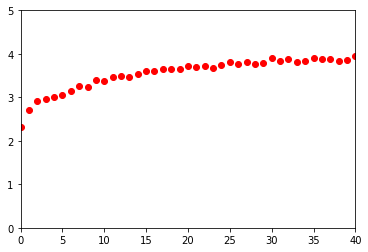

In [73]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.axis([0, 40, 0, 5])
plt.show()

In [82]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=y[:100])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

## Building height vs. damage grade

In [84]:
train[['height_ft_pre_eq','damage_grade']]

,height_ft_pre_eq,damage_grade
0,13,5.0
1,15,5.0
2,12,3.0
3,10,3.0
4,8,3.0
...,...,...
515932,14,5.0
515933,9,3.0
515934,18,1.0
515935,24,3.0


In [85]:
info = dict()
total = dict()
for i in range(len(train)):
    age = train['height_ft_pre_eq'][i]
    if age not in info:
        info[age] = 0
    if age not in total:
        total[age] = 0
    info[age] += train['damage_grade'][i]
    total[age] += 1

In [86]:
for i in info:
    info[i] = info[i] / total[i]
    
els = list(info.items())
els.sort()

x = [i[0] for i in els]
y = [i[1] for i in els]

In [96]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=y[:100])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

# Deep Learning approach

In [158]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from torch.utils.data import random_split
from pytorch_lightning.metrics import Accuracy, RMSE

In [159]:
scale_range = (-1,1)
scaler = MinMaxScaler(scale_range)
X = scaler.fit_transform(X)
X_submission = scaler.transform(X_submission)

In [179]:
class HackZurichDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, data, labels=None, do_classification=True):
        self.do_classification = do_classification
        self.data = data.astype("float32")
        self.labels = labels - 1
        if not self.do_classification:
            self.labels = self.labels.astype("float32")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Retreive data & label if available
        data = self.data[idx]
        if self.labels is None:
            label = None
        else:
            label = self.labels[idx]
            
        return {'data': data,
                'label': label}

In [180]:
class HackZurichDataModule(pl.LightningDataModule):

      def __init__(self, data, labels=None, batch_size=32, num_workers=12, splits = [0.95, 0.045, 0.005], do_classification=True):
          super().__init__()
          self.batch_size = batch_size
          self.do_classification = do_classification
          self.dataset = HackZurichDataset(data, labels, do_classification)
          self.splits = splits
          self.num_workers = num_workers
          size = len(self.dataset)
          sizes = (int(splits[0] * size), int(splits[1] * size), size - int((splits[0] + splits[1]) * size))
          self.train, self.valid, self.test = random_split(self.dataset, sizes)

      # return the dataloader for each split
      def train_dataloader(self):
          mnist_train = DataLoader(self.train, batch_size=self.batch_size, num_workers=self.num_workers)
          return mnist_train

      def val_dataloader(self):
          mnist_val = DataLoader(self.valid, batch_size=self.batch_size, num_workers=self.num_workers)
          return mnist_val

      def test_dataloader(self):
          mnist_test = DataLoader(self.test, batch_size=self.batch_size, num_workers=self.num_workers)
          return mnist_test

In [208]:
class HackZurichModel(pl.LightningModule):

    def __init__(self, n_features, n_classes = None):
        super().__init__()
        
        # Inits
        self.do_classification = (n_classes is not None)
        self.rmse = RMSE()
        if self.do_classification:
            self.acc = Accuracy()
            # self.ordinary_loss = OrdinalLoss()
        
        # Layers
        self.layers = nn.Sequential(nn.Linear(n_features, 300),
                                    nn.ReLU(),
                                    nn.Dropout(0.1),
                                    nn.Linear(300, 300),
                                    nn.BatchNorm1d(300),
                                    nn.ReLU(),
                                    nn.Dropout(0.1),
                                    # nn.Linear(300, 300),
                                    # nn.BatchNorm1d(300),
                                    # nn.ReLU(),
                                    # nn.Dropout(0.1),
                                    nn.Linear(300, 200),
                                    nn.BatchNorm1d(200),
                                    nn.ReLU(),
                                    nn.Dropout(0.1),
                                    nn.Linear(200, 100),
                                    nn.ReLU(),
                                    nn.Dropout(0.2),
                                    nn.Linear(100, 1 if n_classes is None else n_classes))
        """
        # Layers
        self.layers = nn.Sequential(nn.Linear(n_features, 300),
                                    nn.ReLU(),
                                    nn.Dropout(0.2),
                                    nn.Linear(300, 200),
                                    nn.ReLU(),
                                    nn.Dropout(0.2),
                                    nn.Linear(200, 100),
                                    nn.ReLU(),
                                    nn.Dropout(0.2),
                                    nn.Linear(100, 1 if n_classes is None else n_classes))
        """
        
    def forward(self, x):
        return self.layers(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch['data'], batch['label']
        y_hat = self(x)
        
        if self.do_classification:
            rmse = self.rmse(torch.argmax(y_hat, 1).type(torch.float32),y.type(torch.float32))
        else:
            rmse = self.rmse(y_hat[:,0], y)
            
        if self.do_classification:
            acc = self.acc(y_hat, y)
        else:
            acc = -1
            
        if self.do_classification:
            # loss = self.ordinary_loss(y_hat, y)
            loss = F.cross_entropy(y_hat, y)
        else:
            loss = F.mse_loss(y_hat[:,0], y)
            
        result = pl.TrainResult(loss)
        result.log('train_loss', loss)
        result.log('train_rmse', rmse)
        result.log('train_acc', acc)
        return result

    def validation_step(self, batch, batch_idx):
        x, y = batch['data'], batch['label']
        y_hat = self(x)
        
        if self.do_classification:
            rmse = self.rmse(torch.argmax(y_hat, 1).type(torch.float32), y.type(torch.float32))
        else:
            rmse = self.rmse(y_hat[:,0], y)
            
        if self.do_classification:
            acc = self.acc(y_hat, y)
        else:
            acc = -1
        
        if self.do_classification:
            loss = F.cross_entropy(y_hat, y)
            # loss = F.cross_entropy(y_hat, y) + F.mse_loss(torch.argmax(y_hat, 1).type(torch.float32), y)
            # loss = F.mse_loss(torch.argmax(y_hat, 1).type(torch.float32), y)
        else:
            loss = F.mse_loss(y_hat[:,0], y)
            
        return np.array([loss, rmse, acc])
    
    def validation_epoch_end(self, validation_step_outputs):
        outputs = np.array(validation_step_outputs)
        means = torch.tensor(np.mean(outputs, axis=0))
        loss = means[0]
        rmse = means[1]
        acc = means[2]
        
        print("Validation Loss:", loss)
        print("Validation RMSE:", rmse)
        if self.do_classification:
            print("Validation accuracy:", acc)
            
        result = pl.EvalResult(checkpoint_on=loss)
        result.log('val_loss', loss)
        result.log('val_rmse', rmse)
        result.log('val_acc', acc)
        return result

    def test_step(self, batch, batch_idx):
        x, y = batch['data'], batch['label']
        y_hat = self(x)
        
        if self.do_classification:
            loss = F.cross_entropy(y_hat, y)
        else:
            loss = F.mse_loss(y_hat, y)
            
        result = pl.EvalResult()
        result.log('test_loss', loss)
        return result

In [209]:
# Params
do_classification = True

In [210]:
# init data
dm = HackZurichDataModule(X, y, batch_size=128, do_classification=do_classification)

In [211]:
# init model
n_features = len(dm.train[0]['data'])
n_classes = 5
model = HackZurichModel(n_features, n_classes if do_classification else None)

In [213]:
# most basic trainer, uses good defaults (auto-tensorboard, checkpoints, logs, and more)
trainer = pl.Trainer()
trainer.fit(model, dm)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name   | Type       | Params
--------------------------------------
0 | rmse   | RMSE       | 0     
1 | acc    | Accuracy   | 0     
2 | layers | Sequential | 187 K 


Validation Loss: tensor(2.3269)
Validation RMSE: tensor(1.0933)
Validation accuracy: tensor(0.5625)


Validation Loss: tensor(2.6844)
Validation RMSE: tensor(1.2006)
Validation accuracy: tensor(0.4480)


Validation Loss: tensor(2.6648)
Validation RMSE: tensor(1.1963)
Validation accuracy: tensor(0.4556)


Validation Loss: tensor(2.6367)
Validation RMSE: tensor(1.1861)
Validation accuracy: tensor(0.4569)


Validation Loss: tensor(2.6298)
Validation RMSE: tensor(1.1860)
Validation accuracy: tensor(0.4581)


Validation Loss: tensor(2.5999)
Validation RMSE: tensor(1.1762)
Validation accuracy: tensor(0.4621)


Validation Loss: tensor(2.5761)
Validation RMSE: tensor(1.1675)
Validation accuracy: tensor(0.4650)


Validation Loss: tensor(2.5498)
Validation RMSE: tensor(1.1585)
Validation accuracy: tensor(0.4671)


Validation Loss: tensor(2.5377)
Validation RMSE: tensor(1.1549)
Validation accuracy: tensor(0.4705)


Validation Loss: tensor(2.5733)
Validation RMSE: tensor(1.1709)
Validation accuracy: tensor(0.4702)


Validation Loss: tensor(2.5422)
Validation RMSE: tensor(1.1583)
Validation accuracy: tensor(0.4729)


Saving latest checkpoint..


1

In [215]:
if do_classification:
    result = model(torch.Tensor(X_submission)).argmax(1)
else:
    result = model(torch.Tensor(X_submission))[:,0]

# Write prediction data to file

In [36]:
value_set = [1,2,3,4,5]
def return_closest(n):
  return min(value_set, key=lambda x:abs(x-n))

In [37]:
test_data = pd.read_csv('data/test.csv')
with open("prediction.csv", 'w') as file:
    file.write("building_id,damage_grade")
    for ind in range(len(result)):
        file.write("\n{},{}".format(str(int(test_data.iloc[ind]['building_id'])),str(return_closest(result[ind]))))